**Handwritten Digits Recognition with scikit-learn**

Load dataset

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
print(dir(digits))
print(type(digits.images))
print(digits.images.shape)
print(type(digits.target))
print(digits.target.shape)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
<class 'numpy.ndarray'>
(1797, 8, 8)
<class 'numpy.ndarray'>
(1797,)


In dataset we have 1797 images with size 8x8.

Example images:

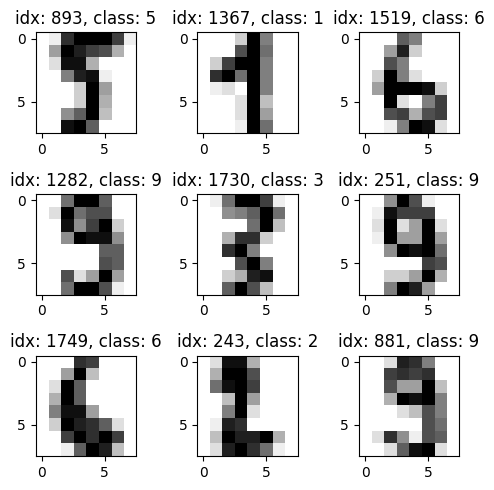

In [ ]:
import matplotlib.pyplot as plt
import random

rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(5, 5))

for ax in axes.flat:
    idx = random.randint(1, digits.images.shape[0])
    ax.imshow(digits.images[idx], cmap='binary')
    ax.set_title("idx: " + str(idx) + ", class: " + str(digits.target[idx]))
    #ax.axis('off')

plt.tight_layout()
plt.show()


Images flatten - 1797x8x8 -> 1797x64

In [ ]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

Training (70%) and test (30%) dataset

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Neural Network:
- default input layer - 64 nodes
- hidden layer - 20 neurons
- output layer - 10 neurons

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1)

Training

In [ ]:
mlp.fit(x_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=20,
              learning_rate_init=0.1, random_state=1, solver='sgd')

Evaluation

In [ ]:
predictions = mlp.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

acc = accuracy_score(y_test, predictions)
print("Accuracy score: %.4f\n" % acc)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Accuracy score: 0.9722

Confusion Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 48  1  0  0  0  0  0  1  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  0  0  0 59  0  1  0  0  0]
 [ 0  1  1  0  0 63  1  0  0  0]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  0  0  0  0  4 54]]
